<img align=left src="http://www.nus.edu.sg/templates/t3_nus2015/images/assets/logos/logo.png" width=125>
<br><br>
# RE2708 Lecture 3

## The MATPLOTLIB Module: Plotting graphs

Dr. Cristian Badarinza

## Structure of this Lecture

- First part (1 hour): **Learning**

- Second part (30 minutes): **Reviewing** and **Debugging**

## Table of Contents

### Working with data

1. Loading the libaries and the data
1. The life cycle of a plot
    * The `figure` canvas
    * Line styles and colors
    * Legends
    * Titles and axis labels
    * Annotations
    * Exporting the figure
1. Examples

## 1. Loading the libraries and the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.close_figures=False

In [2]:
df = pd.read_csv('Data/S-REIT Stock Prices.csv',parse_dates=['Month'])

**Note** that we have used the option `parse_dates` to make sure that Python reads the dates properly.

How does the data look like?

In [3]:
df.head()

,Month,Ascott Residence Trust,Frasers Commercial Trust,Parkway Life,Suntec,Keppel Infrastructure Trust,Starhill Global,Ascendas,CapitaLand Commercial Trust,Mapletree Logistics Trust,Mapletree Industrial Trust
0,2011-01-31,0.658107,0.507004,1.235749,0.967838,0.305454,0.396472,1.241448,0.877324,0.555511,0.624807
1,2011-02-28,0.703961,0.494563,1.214443,1.007074,0.311540,0.393501,1.266277,0.883676,0.558592,0.636938
2,2011-03-31,0.703961,0.497673,1.228647,0.993996,0.311540,0.403021,1.260070,0.915464,0.558592,0.655133
3,2011-04-30,0.686362,0.528460,1.299667,1.003217,0.314393,0.403021,1.302508,0.934540,0.574561,0.709728
4,2011-05-31,0.663732,0.522015,1.324428,0.996573,0.305823,0.419612,1.289863,0.921823,0.577701,0.722767


#### Getting started

Here is a simple plot of REIT stock price data.

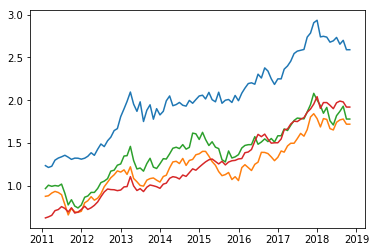

In [4]:
plt.plot(df['Month'],df['Parkway Life'])
plt.plot(df['Month'],df['CapitaLand Commercial Trust'])
plt.plot(df['Month'],df['Suntec'])
plt.plot(df['Month'],df['Mapletree Industrial Trust'])
plt.show()

Is it a nice plot? Is anything missing?

## 2. The life cycle of a plot

* The plot canvas
* Line styles and colors
* Legends
* Titles and axis labels
* Annotations
* Exporting the figure

### The plot canvas

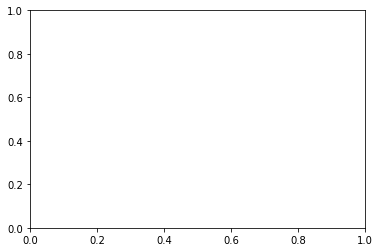

In [5]:
fig, ax = plt.subplots(1,1)

### Line styles and colors

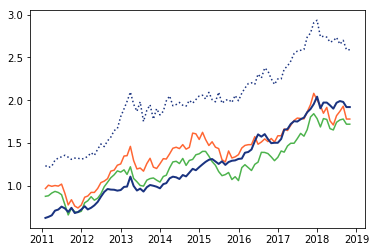

In [6]:
plt.plot(df['Month'],df['Parkway Life'], linestyle='dotted', color=(.1,.2,.5))
plt.plot(df['Month'],df['CapitaLand Commercial Trust'], linestyle='solid', color=(.3,.7,.3))
plt.plot(df['Month'],df['Suntec'],linestyle='solid', color=(1,.4,.2))
plt.plot(df['Month'],df['Mapletree Industrial Trust'], linestyle='solid', color=(.1,.2,.5), linewidth=2)
fig

**Note** that colors are given in sets of three numbers between 0 and 1: `(Red, Green, Blue)`

For example: *Red* = (1,0,0), *Black* = (0,0,0), *White* = (1,1,1), *Light gray* = (.9,.9,.9)

### Legends

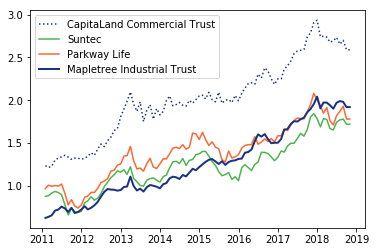

In [7]:
plt.legend(['CapitaLand Commercial Trust','Suntec','Parkway Life','Mapletree Industrial Trust'],loc='best')
fig

### Titles and axis labels

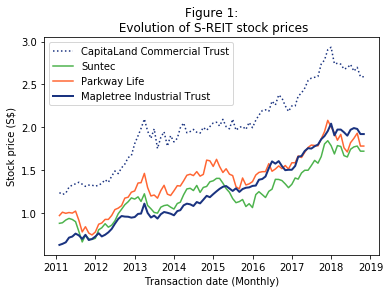

In [8]:
plt.title('Figure 1:\n Evolution of S-REIT stock prices')
plt.xlabel('Transaction date (Monthly)')
plt.ylabel('Stock price (S$)')
fig

### Grids

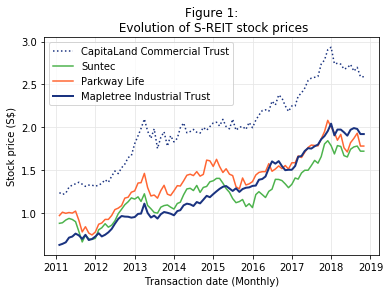

In [9]:
ax.set_axisbelow(True)
plt.grid(color=(.9,.9,.9))
fig

### Annotations

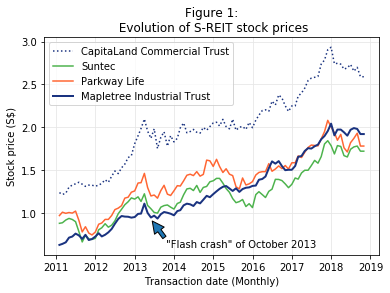

In [10]:
ax.annotate('"Flash crash" of October 2013', xycoords='figure fraction', 
            xy=(.39, .245), xytext=(.425, .155), arrowprops={'width':4})
fig

**Note** the option `xycoords='figure fraction'`. This means that we indicate the coordinates as fractions of the figure's width and height.

### Exporting the figure

In [11]:
fig.savefig('Figure REITs.png')

# Applications

* Figure 1: **Pie Chart** (Frequency of transactions by HDB town)
* Figure 2: **Bar Chart** (Average HDB resale prices by region)
* Figure 3: **Line Chart** with Markers (HDB resale prices by month)
* Figure 4: **Scatter plot** (Prices and floor area)
* Figure 5: **Heatmap** (Frequency distribution of prices and floor area)

### Loading the data

Let's load a data set that we are familiar with from Lecture 2.

Exactly as in Lecture 2, we first need to clean it (using the `dropna` and `loc` functions), and to merge it with the data on regions.

In [12]:
df = pd.read_csv('Data/hdb-transactions-2018.csv')
df = df.dropna()
df = df.loc[df['resale_price']>0]
dreg = pd.read_csv('Data/regions.csv')
df = pd.merge(df, dreg, on='town')

### Figure 1

**Frequency of transactions by HDB town**

We start by using the function `groupby` to find the number of transactions for each HDB town, and then plot the pie chart using the function `pie`:

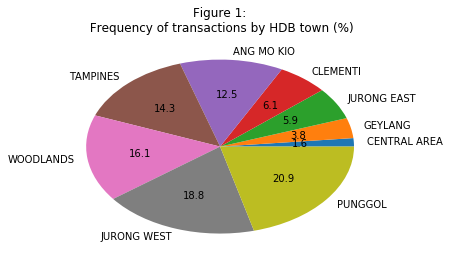

In [13]:
fig, ax = plt.subplots(1,1)

dg = df.groupby('town').count().sort_values('resale_price')
plt.pie(dg['resale_price'],autopct='%.1f',labels=dg.index)

plt.title('Figure 1:\n Frequency of transactions by HDB town (%)')

ax.set_axisbelow(True)
plt.grid(color=(.9,.9,.9))

fig.savefig('Figure 1.png')

### Figure 2

**Average HDB resale prices by region**

We start by using the function `groupby` to find the average price for each region, and then plot the bar chart using the function `bar`:

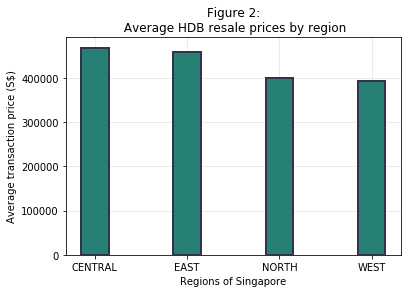

In [14]:
fig, ax = plt.subplots(1,1)

dg = df.groupby('region').mean().sort_values('resale_price')
plt.bar(dg.index,dg['resale_price'],width=.3,color=(.15,.5,.45),edgecolor=(.2,.2,.3),linewidth=2)

plt.title('Figure 2:\n Average HDB resale prices by region')
plt.xlabel('Regions of Singapore')
plt.ylabel('Average transaction price (S$)')

ax.set_axisbelow(True)
plt.grid(color=(.9,.9,.9))

fig.savefig('Figure 2.png')

### Figure 3

**HDB resale prices by month**

We start by using the function `groupby` to find the average price in each month, and then plot the line chart using the function `plot` as before, with the additional option `marker`:

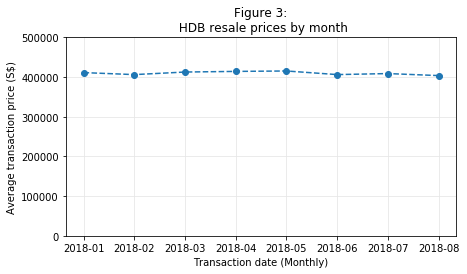

In [15]:
fig, ax = plt.subplots(1,1,figsize=(7,3.65))

dt = df.groupby('month').mean()
plt.plot(dt.index,dt['resale_price'],linestyle='dashed',marker='o',markersize=6)

plt.ylim(0,500000)

plt.title('Figure 3:\n HDB resale prices by month')
plt.xlabel('Transaction date (Monthly)')
plt.ylabel('Average transaction price (S$)')

ax.set_axisbelow(True)
plt.grid(color=(.9,.9,.9))    

fig.savefig('Figure 3.png')

### Figure 4

**Scatter plot of prices and floor area**

We write a `for` loop to go from one region to another and use the function `scatter` to plot a scatter plot for each region:

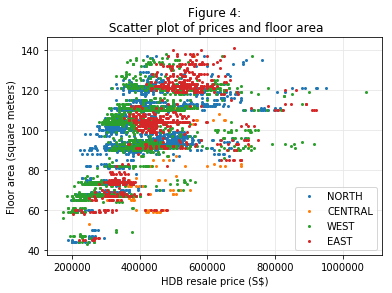

In [16]:
fig, ax = plt.subplots(1,1)

for region in df['region'].unique():
    plt.scatter(df.loc[df['region']==region,'resale_price'],df.loc[df['region']==region,'floor_area_sqm'],s=4)

plt.legend(df['region'].unique())

plt.title('Figure 4:\n Scatter plot of prices and floor area')
plt.xlabel('HDB resale price (S$)')
plt.ylabel('Floor area (square meters)')

ax.set_axisbelow(True)
plt.grid(color=(.9,.9,.9))

fig.savefig('Figure 4.png')

### Figure 5

**Frequency distribution of prices and floor area**

We use the function `hist2d` to plot a heatmap of prices and floor area:

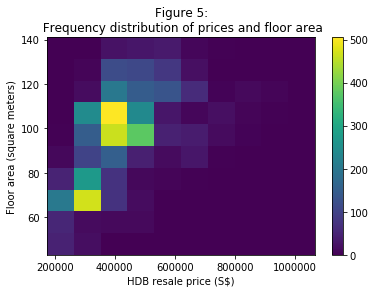

In [17]:
fig, ax = plt.subplots(1,1,)

h = plt.hist2d(df['resale_price'],df['floor_area_sqm'])
plt.colorbar(h[3])

plt.title('Figure 5:\n Frequency distribution of prices and floor area')
plt.xlabel('HDB resale price (S$)')
plt.ylabel('Floor area (square meters)')

fig.savefig('Figure 5.png')

### THE END